In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def central_difference(data):
    data_diff = np.zeros(data.shape,float)
    data_diff[:,0] = data[:,0]
    h = np.diff(data[:,0])
    h2 = np.mean(h)*2
    fa = data[:-2,1]
    fb = data[2:,1]
    df = (fb - fa) / h2
    faa = (data[1,1]-data[0,1])/h[0]
    fbb = (data[-1,1]-data[-2,1])/h[-1]
    data_diff[0,1] = faa
    data_diff[1:-1,1] = df
    data_diff[-1,1] = fbb
    return data_diff

def integrate_trapezoidal(data):
    data_int = np.zeros(data.shape,float)
    data_int[:,0] =data[:,0]
    dt = np.diff(data[:,0])
    y = data[:,1]
    y[1:] = 0.5*dt*(y[:-1]+y[1:])
    data_int[:,1] = y.cumsum()
    return data_int

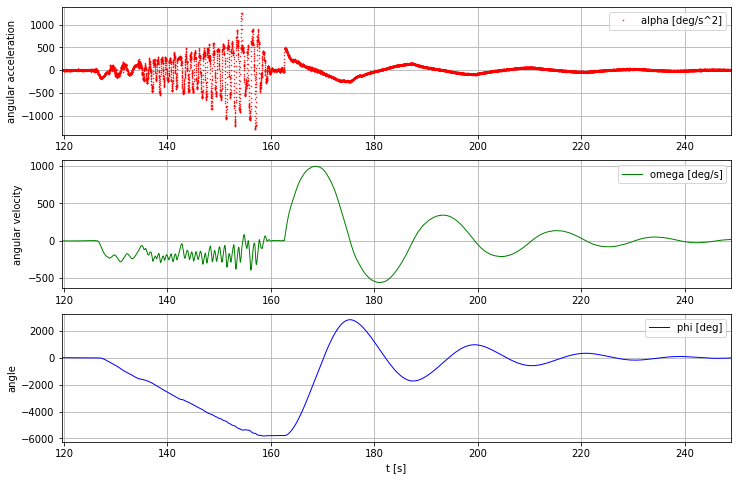

In [3]:
fn = 'gyroscope_rotation_rate1.csv'

data_ = np.loadtxt(fn,delimiter=',',skiprows=1)

data = data_[12_000:25_000,[0,3]]
data[:,1] *= 180.0/np.pi

data_diff = central_difference(np.copy(data))
data_int = integrate_trapezoidal(np.copy(data))

fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(311)
ax1.plot(data_diff[:,0],data_diff[:,1],'.r',markersize=1.0,label='alpha [deg/s^2]')
ax1.set_ylabel('angular acceleration')
ax1.set_xlim([data[0,0],data[-1,0]])
ax1.legend()
ax1.grid()

ax2 = fig.add_subplot(312)
ax2.plot(data[:,0],data[:,1],'-g',lw=1,label='omega [deg/s]' )
ax2.set_ylabel('angular velocity')
ax2.set_xlim([data[0,0],data[-1,0]])
ax2.legend()
ax2.grid()

ax3 = fig.add_subplot(313)
ax3.plot(data_int[:,0],data_int[:,1],'-b',lw=1,label='phi [deg]')
ax3.set_ylabel('angle')
ax3.set_xlim([data[0,0],data[-1,0]])
ax3.legend()
ax3.grid()

plt.xlabel('t [s]')
plt.show()
# plt.savefig('angular_velocity_derivation1.png',dpi=200,format='png')
# plt.close()

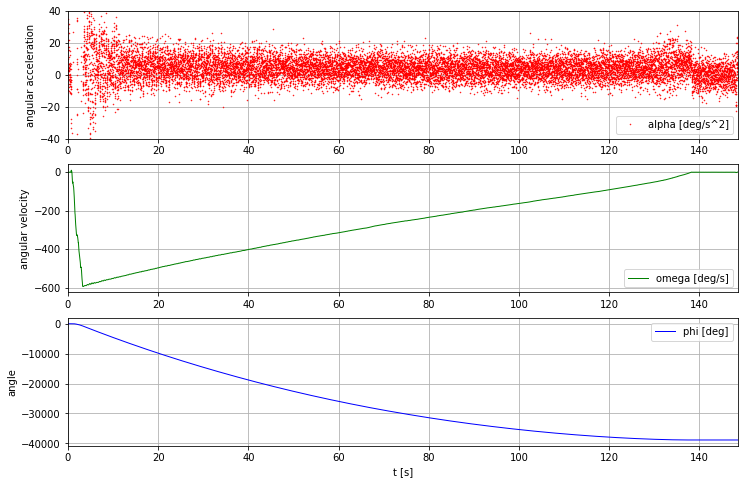

In [4]:
fn = 'gyroscope_rotation_rate2.csv'

data_ = np.loadtxt(fn,delimiter=',',skiprows=1)
data = data_[:,[0,3]]
data[:,1] *= 180.0/np.pi

data_diff = central_difference(np.copy(data))
data_int = integrate_trapezoidal(np.copy(data))

fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(311)
ax1.plot(data_diff[:,0],data_diff[:,1],'.r',markersize=1.0,label='alpha [deg/s^2]')
ax1.set_ylabel('angular acceleration')
ax1.set_xlim([data[0,0],data[-1,0]])
ax1.set_ylim([-40,40])
ax1.legend()
ax1.grid()

ax2 = fig.add_subplot(312)
ax2.plot(data[:,0],data[:,1],'-g',lw=1,label='omega [deg/s]' )
ax2.set_ylabel('angular velocity')
ax2.set_xlim([data[0,0],data[-1,0]])
ax2.legend()
ax2.grid()

ax3 = fig.add_subplot(313)
ax3.plot(data_int[:,0],data_int[:,1],'-b',lw=1,label='phi [deg]')
ax3.set_ylabel('angle')
ax3.set_xlim([data[0,0],data[-1,0]])
ax3.legend()
ax3.grid()

plt.xlabel('t [s]')
plt.show()
# plt.savefig('angular_velocity_derivation2.png',dpi=200,format='png')
# plt.close()